# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_mouse_data= pd.merge(study_results, mouse_metadata, on='Mouse ID')

merge_mouse_data.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.

unique_mice_count = merge_mouse_data['Mouse ID'].nunique()
print("Number of unique mice:", unique_mice_count)

Number of unique mice: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_mouse_data[merge_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Get the unique Mouse IDs that have duplicates
duplicate_mouse_ids = duplicates['Mouse ID'].unique()
print("Duplicate rows based on 'Mouse ID' and 'Timepoint':")
print(duplicate_mouse_ids)

Duplicate rows based on 'Mouse ID' and 'Timepoint':
['g989']


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_mouse_unique = merge_mouse_data[~merge_mouse_data['Mouse ID'].isin(duplicate_mouse_ids)]
merge_mouse_unique.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_countv2 = merge_mouse_unique['Mouse ID'].nunique()
print("Number of unique mice:", unique_mice_countv2)

Number of unique mice: 248


## Summary Statistics

In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = merge_mouse_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
).reset_index()
display(summary_statistics)

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

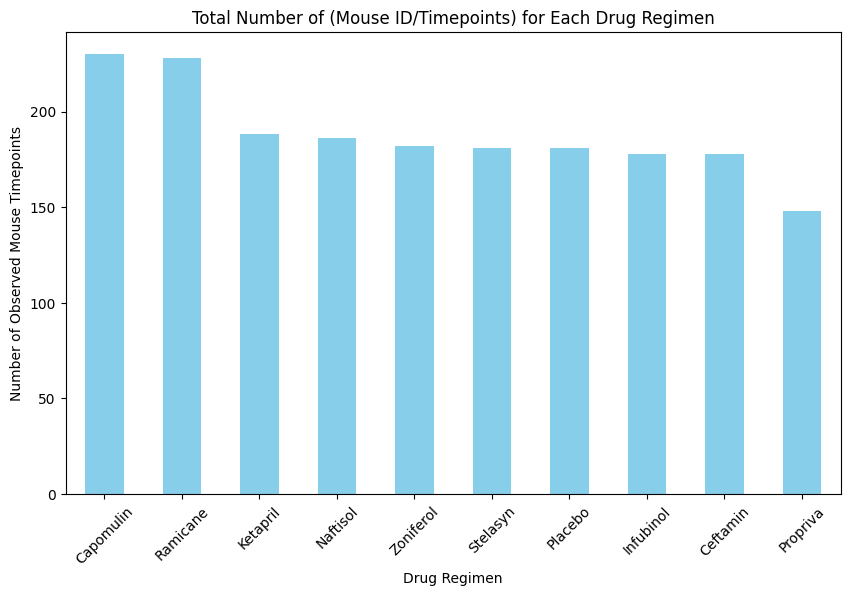

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate the bar plot using Pandas
plot = merge_mouse_unique['Drug Regimen'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue', title='Total Number of (Mouse ID/Timepoints) for Each Drug Regimen')
plot.set_xlabel('Drug Regimen')
plot.set_ylabel('Number of Observed Mouse Timepoints')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

# Show the plot
plt.show()

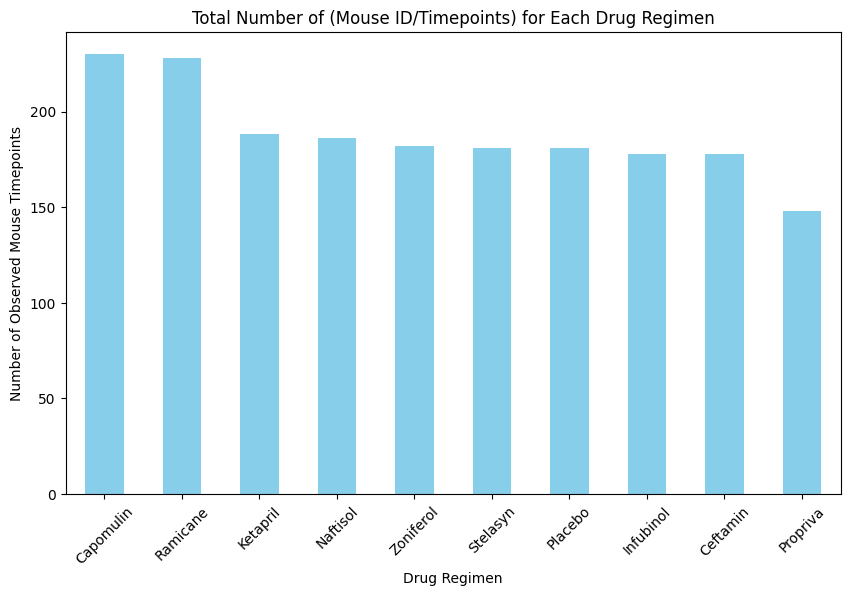

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
merge_mouse_unique['Drug Regimen'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Total Number of (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

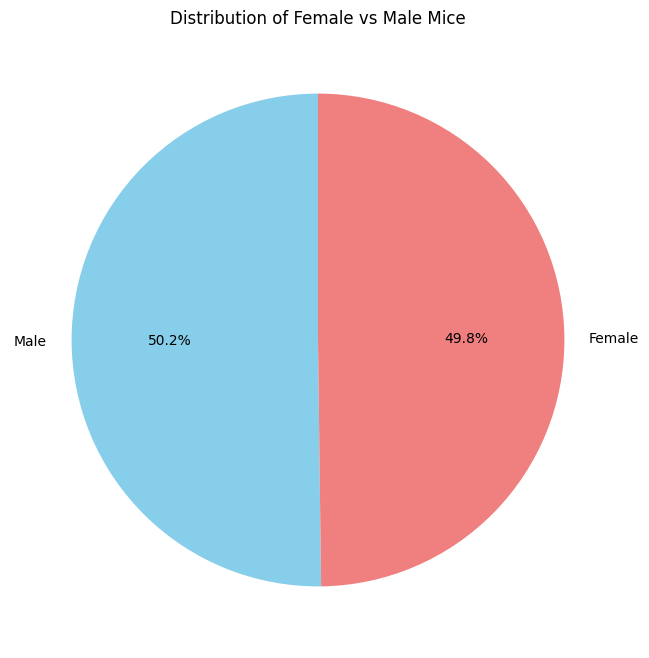

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate the distribution of female versus male mice
gender_counts = mouse_metadata['Sex'].value_counts()
plot = gender_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'], title='Distribution of Female vs Male Mice')
plot.set_ylabel('')  # Hide the y-label

# Show the plot
plt.show()

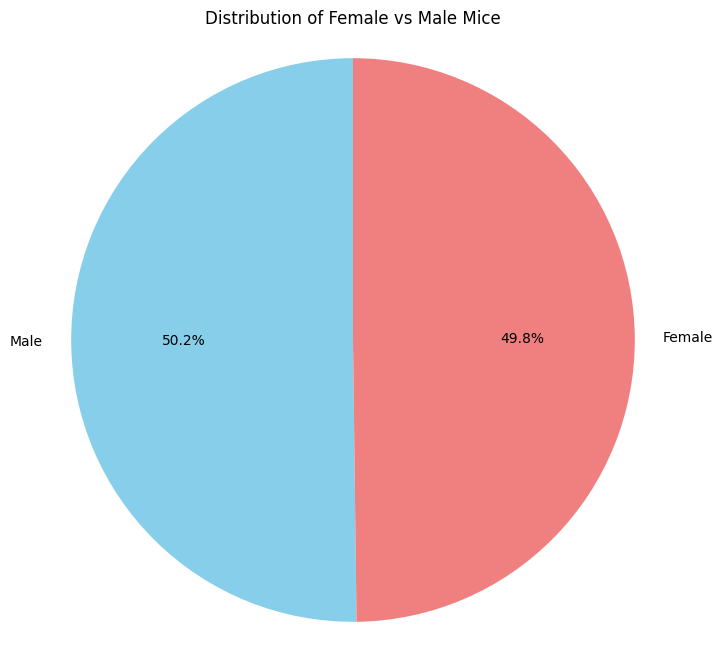

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = merge_mouse_unique.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints, merge_mouse_unique, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {treatment: [] for treatment in treatment_regimens}
for treatment in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]
    tumor_volumes = treatment_df['Tumor Volume (mm3)']

    # Add subset to the tumor volume data dictionary
    tumor_vol_data[treatment] = tumor_volumes.tolist()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
        
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f'{treatment} regimen:')
    print(f'Q1: {lowerq}')
    print(f'Q3: {upperq}')
    print(f'IQR: {iqr}')
    print(f'Lower bound: {lower_bound}')
    print(f'Upper bound: {upper_bound}')
    print(f'Potential outliers: {outliers.tolist()}\n')



Capomulin regimen:
Q1: 32.37735684
Q3: 40.1592203
IQR: 7.781863460000004
Lower bound: 20.70456164999999
Upper bound: 51.83201549
Potential outliers: []

Ramicane regimen:
Q1: 31.56046955
Q3: 40.65900627
IQR: 9.098536719999998
Lower bound: 17.912664470000003
Upper bound: 54.30681135
Potential outliers: []

Infubinol regimen:
Q1: 54.04860769
Q3: 65.52574285
IQR: 11.477135160000003
Lower bound: 36.83290494999999
Upper bound: 82.74144559000001
Potential outliers: [36.3213458]

Ceftamin regimen:
Q1: 48.72207785
Q3: 64.29983003
IQR: 15.577752179999997
Lower bound: 25.355449580000002
Upper bound: 87.66645829999999
Potential outliers: []



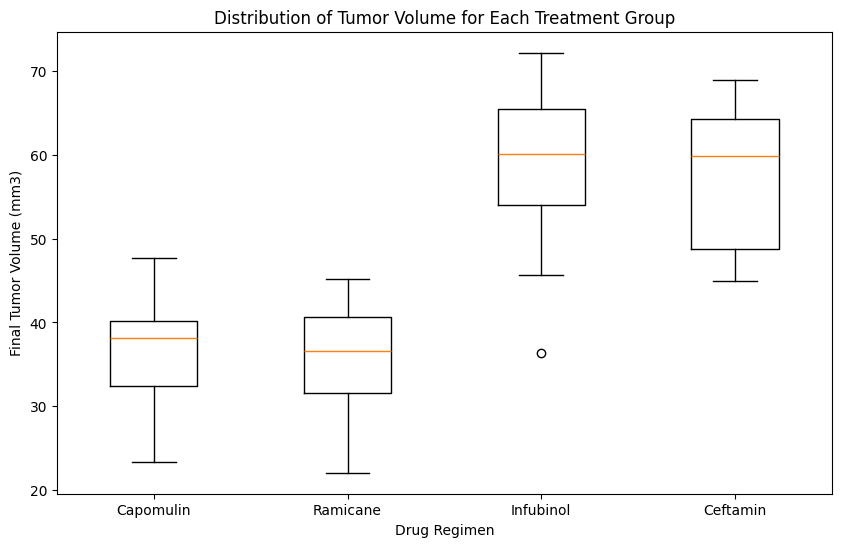

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data.values(), tick_labels=treatment_regimens)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

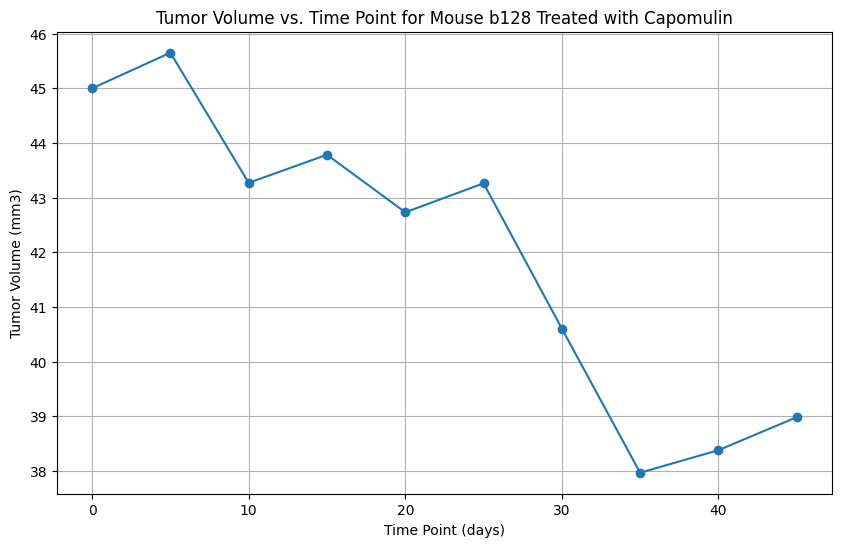

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for mice treated with Capomulin
capomulin_df = merge_mouse_unique[merge_mouse_unique['Drug Regimen'] == 'Capomulin']

# Select a single mouse treated with Capomulin 
single_mouse_id = capomulin_df['Mouse ID'].iloc[0]
single_mouse_df = capomulin_df[capomulin_df['Mouse ID'] == single_mouse_id]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_df['Timepoint'], single_mouse_df['Tumor Volume (mm3)'], marker='o', linestyle='-')
plt.title(f'Tumor Volume vs. Time Point for Mouse {single_mouse_id} Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

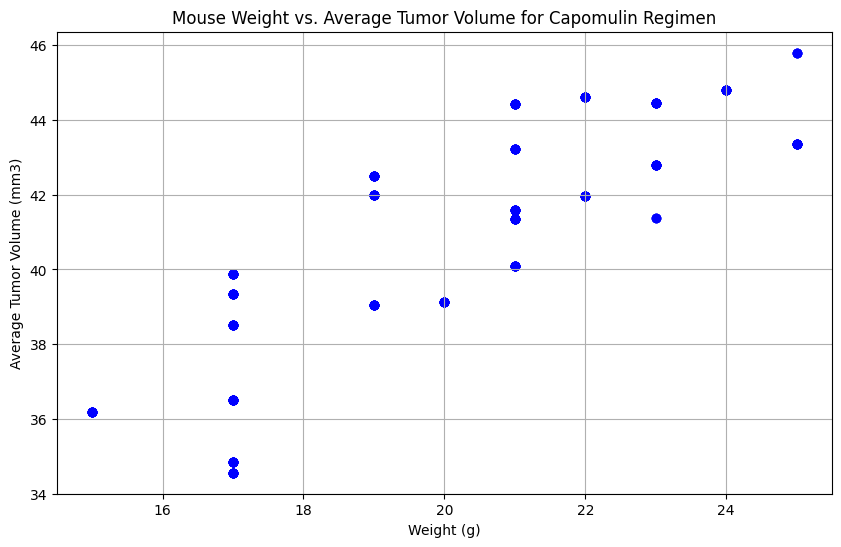

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for mice treated with Capomulin
capomulin_study_df = merge_mouse_unique[merge_mouse_unique['Drug Regimen'] == 'Capomulin']


# Calculate the average observed tumor volume for each mouse
avg_tumor_volume_df = capomulin_study_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_volume_df = avg_tumor_volume_df.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

# Merge the average tumor volume data with the mouse metadata to get the weights
merged_capomulin_df = pd.merge(avg_tumor_volume_df, merge_mouse_unique, on='Mouse ID')

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_capomulin_df['Weight (g)'], merged_capomulin_df['Average Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation coefficient: 0.8343958614425957


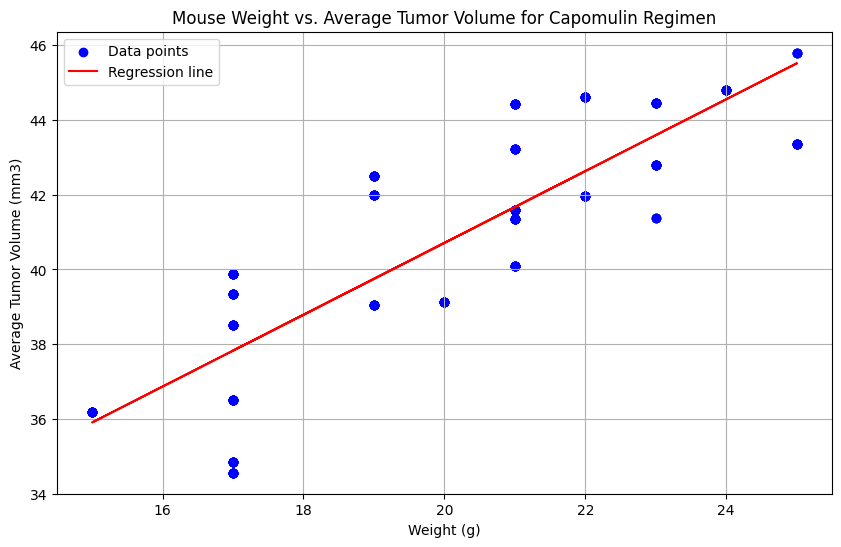

Slope: 0.9609669432428362
Intercept: 21.48982721329954
R-squared: 0.6962164535925314
P-value: 6.495737656135933e-61
Standard error: 0.04203886745939214


In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
correlation = merged_capomulin_df['Weight (g)'].corr(merged_capomulin_df['Average Tumor Volume (mm3)'])
print(f'Correlation coefficient: {correlation}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_capomulin_df['Weight (g)'], merged_capomulin_df['Average Tumor Volume (mm3)'])

# Generate the regression line
regression_line = slope * merged_capomulin_df['Weight (g)'] + intercept

# Generate the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_capomulin_df['Weight (g)'], merged_capomulin_df['Average Tumor Volume (mm3)'], color='blue', label='Data points')
plt.plot(merged_capomulin_df['Weight (g)'], regression_line, color='red', label='Regression line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()

# Display the regression details
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_value**2}')
print(f'P-value: {p_value}')
print(f'Standard error: {std_err}')
